In [2]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 days 7 hours 11 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_Paul_chj76n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.413 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
data = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
train, valid, test = data.split_frame ([0.8,0.1], seed=60)

In [ ]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

In [8]:
y = "IsArrDelayed"
ignoreFields = ["ArrDelay", "DepDelay",
  "CarrierDelay", "WeatherDelay",
  "LateAircraftDelay", "IsDepDelayed",
  "IsArrDelayed", "ActualElapsedTime"]
xAll = [i for i in train.names if i not in ignoreFields]
xLikely = ["Month", "DayOfWeek", "UniqueCarrier",
             "Origin", "Dest", "Distance", "Cancelled", "Diverted"]

In [9]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [10]:
m_def = H2ODeepLearningEstimator()
%time m_def.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1min 20s


In [11]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.09769116769750347
RMSE: 0.3125558633228682
LogLoss: 0.30215365535243877
Mean Per-Class Error: 0.14080695926757503
AUC: 0.9412284317042413
AUCPR: 0.957372350265337
Gini: 0.8824568634084826

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46274817235793986: 


,,NO,YES,Error,Rate
0,NO,1606.0,344.0,0.1764,(344.0/1950.0)
1,YES,283.0,2218.0,0.1132,(283.0/2501.0)
2,Total,1889.0,2562.0,0.1409,(627.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.462748,0.876160,212.0
1,max f2,0.148515,0.918100,326.0
2,max f0point5,0.777915,0.898110,103.0
3,max accuracy,0.462748,0.859133,212.0
4,max precision,0.999964,1.000000,0.0
5,max recall,0.004953,1.000000,395.0
6,max specificity,0.999964,1.000000,0.0
7,max absolute_mcc,0.545819,0.713759,184.0
8,max min_per_class_accuracy,0.528450,0.855658,190.0
9,max mean_per_class_accuracy,0.576511,0.859193,173.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 55.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.023366,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.041583,0.041583,77.968812,77.968812,0.041583
1,2,0.030106,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.011995,0.053579,77.968812,77.968812,0.053579
2,3,0.040216,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.071571,77.968812,77.968812,0.071571
3,4,0.050101,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.089164,77.968812,77.968812,0.089164
4,5,0.100202,0.999983,1.779688,1.779688,1.000000,0.999996,1.000000,0.999998,0.089164,0.178329,77.968812,77.968812,0.178329
5,6,0.150079,0.999471,1.779688,1.779688,1.000000,0.999840,1.000000,0.999945,0.088764,0.267093,77.968812,77.968812,0.267093
6,7,0.200180,0.995672,1.771707,1.777691,0.995516,0.997841,0.998878,0.999419,0.088764,0.355858,77.170746,77.769072,0.355345
7,8,0.300157,0.945580,1.751693,1.769031,0.984270,0.976718,0.994012,0.991857,0.175130,0.530988,75.169303,76.903131,0.526885
8,9,0.400135,0.801537,1.567725,1.718733,0.880899,0.879182,0.965750,0.963704,0.156737,0.687725,56.772527,71.873306,0.656443
9,10,0.500112,0.607446,1.243782,1.623786,0.698876,0.704340,0.912399,0.911855,0.124350,0.812075,24.378204,62.378553,0.712075


In [12]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1596552151253_38


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,602 weights/biases, 9.2 MB, 353,896 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3804,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.488517,0.479429,0,5.21322e-05,0.0258249,-0.313494,0.216442
2,,3,200,Rectifier,0,0,0,0.270055,0.341739,0,-0.00651051,0.0875989,-0.00719368,0.284702
3,,4,2,Softmax,,0,0,0.0250379,0.0558792,0,-0.0517605,0.294489,-0.00839215,0.332714




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.07615132976513754
RMSE: 0.2759553039264466
LogLoss: 0.24232547637737134
Mean Per-Class Error: 0.10734229453840849
AUC: 0.9646794232037188
AUCPR: 0.9738945399024452
Gini: 0.9293588464074376

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4886742379007693: 


,,NO,YES,Error,Rate
0,NO,3820.0,566.0,0.129,(566.0/4386.0)
1,YES,500.0,5039.0,0.0903,(500.0/5539.0)
2,Total,4320.0,5605.0,0.1074,(1066.0/9925.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.488674,0.904343,201.0
1,max f2,0.244615,0.935252,288.0
2,max f0point5,0.721911,0.924659,125.0
3,max accuracy,0.488674,0.892594,201.0
4,max precision,0.999966,1.000000,0.0
5,max recall,0.009847,1.000000,392.0
6,max specificity,0.999966,1.000000,0.0
7,max absolute_mcc,0.503164,0.782031,196.0
8,max min_per_class_accuracy,0.533227,0.888789,187.0
9,max mean_per_class_accuracy,0.630396,0.892658,155.0



Gains/Lift Table: Avg response rate: 55.81 %, avg score: 56.15 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.023476,1.000000,1.791840,1.791840,1.000000,1.000000,1.000000,1.000000,0.042065,0.042065,79.183968,79.183968,0.042065
1,2,0.030025,1.000000,1.791840,1.791840,1.000000,1.000000,1.000000,1.000000,0.011735,0.053800,79.183968,79.183968,0.053800
2,3,0.040000,1.000000,1.791840,1.791840,1.000000,1.000000,1.000000,1.000000,0.017873,0.071674,79.183968,79.183968,0.071674
3,4,0.050076,1.000000,1.791840,1.791840,1.000000,1.000000,1.000000,1.000000,0.018054,0.089727,79.183968,79.183968,0.089727
4,5,0.100050,0.999981,1.791840,1.791840,1.000000,0.999995,1.000000,0.999998,0.089547,0.179274,79.183968,79.183968,0.179274
5,6,0.150025,0.999463,1.791840,1.791840,1.000000,0.999838,1.000000,0.999944,0.089547,0.268821,79.183968,79.183968,0.268821
6,7,0.200000,0.995807,1.791840,1.791840,1.000000,0.998157,1.000000,0.999498,0.089547,0.358368,79.183968,79.183968,0.358368
7,8,0.300050,0.955752,1.788231,1.790636,0.997986,0.980804,0.999328,0.993264,0.178913,0.537281,78.823074,79.063630,0.536825
8,9,0.400000,0.829741,1.690687,1.765662,0.943548,0.902491,0.985390,0.970583,0.168984,0.706265,69.068744,76.566167,0.693041
9,10,0.500050,0.626429,1.405683,1.693637,0.784491,0.731363,0.945194,0.922719,0.140639,0.846904,40.568289,69.363690,0.784888




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.10008763370274522
RMSE: 0.3163662967238217
LogLoss: 0.31232875968232116
Mean Per-Class Error: 0.1404576838409064
AUC: 0.9379913285752486
AUCPR: 0.9533601489830111
Gini: 0.8759826571504972

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48244991842483126: 


,,NO,YES,Error,Rate
0,NO,1628.0,305.0,0.1578,(305.0/1933.0)
1,YES,288.0,2051.0,0.1231,(288.0/2339.0)
2,Total,1916.0,2356.0,0.1388,(593.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.482450,0.873695,198.0
1,max f2,0.180242,0.909858,306.0
2,max f0point5,0.749388,0.898188,106.0
3,max accuracy,0.482450,0.861189,198.0
4,max precision,0.999971,1.000000,0.0
5,max recall,0.008633,1.000000,390.0
6,max specificity,0.999971,1.000000,0.0
7,max absolute_mcc,0.482450,0.719657,198.0
8,max min_per_class_accuracy,0.511376,0.857217,187.0
9,max mean_per_class_accuracy,0.482450,0.859542,198.0



Gains/Lift Table: Avg response rate: 54.75 %, avg score: 54.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.024579,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.044891,0.044891,82.642155,82.642155,0.044891
1,2,0.030197,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.010261,0.055152,82.642155,82.642155,0.055152
2,3,0.040028,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.017956,0.073108,82.642155,82.642155,0.073108
3,4,0.050094,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.018384,0.091492,82.642155,82.642155,0.091492
4,5,0.100187,0.999986,1.826422,1.826422,1.000000,0.999997,1.000000,0.999998,0.091492,0.182984,82.642155,82.642155,0.182984
5,6,0.150047,0.999593,1.826422,1.826422,1.000000,0.999874,1.000000,0.999957,0.091065,0.274049,82.642155,82.642155,0.274049
6,7,0.200140,0.994873,1.817887,1.824285,0.995327,0.998059,0.998830,0.999482,0.091065,0.365113,81.788687,82.428538,0.364596
7,8,0.300094,0.946239,1.783648,1.810750,0.976581,0.976599,0.991420,0.991860,0.178281,0.543395,78.364821,81.075022,0.537704
8,9,0.400047,0.794309,1.578336,1.752681,0.864169,0.877681,0.959626,0.963332,0.157760,0.701154,57.833619,75.268071,0.665459
9,10,0.500000,0.579970,1.227595,1.647713,0.672131,0.688844,0.902154,0.908460,0.122702,0.823856,22.759481,64.771270,0.715734




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-08-06 16:58:17,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-08-06 16:58:21,8.218 sec,3633 obs/sec,0.384087,1,13541.0,0.477386,0.649537,0.075938,...,0.774290,1.79184,0.358791,0.484625,0.667682,0.051991,0.709575,0.75953,1.826422,0.377341
2,,2020-08-06 16:59:03,51.031 sec,5832 obs/sec,6.957566,18,245289.0,0.326487,0.325337,0.567792,...,0.960744,1.79184,0.136322,0.353996,0.380060,0.494178,0.925245,0.94393,1.826422,0.159410
3,,2020-08-06 16:59:26,1 min 13.674 sec,5872 obs/sec,10.038179,26,353896.0,0.275955,0.242325,0.691228,...,0.973895,1.79184,0.107406,0.316366,0.312329,0.596000,0.937991,0.95336,1.826422,0.138811



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ArrTime,1.000000,1.000000,0.002108
1,CRSArrTime,0.887591,0.887591,0.001871
2,DepTime,0.671321,0.671321,0.001415
3,CRSDepTime,0.661951,0.661951,0.001395
4,TailNum.NA,0.585477,0.585477,0.001234
5,CRSElapsedTime,0.517588,0.517588,0.001091
6,AirTime,0.502388,0.502388,0.001059
7,NASDelay,0.488255,0.488255,0.001029
8,Cancelled,0.400820,0.400820,0.000845
9,TaxiOut,0.395790,0.395790,0.000834



See the whole table with table.as_data_frame()


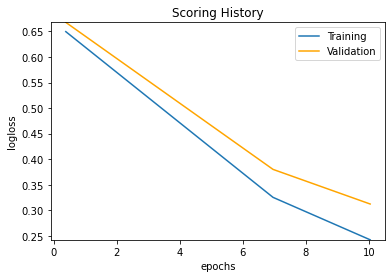

In [13]:
m_def.plot()

tunning idea:lets give it more effort (time) epochs

In [14]:
m_200_epochs = H2ODeepLearningEstimator(epochs = 200,
            stopping_rounds = 5, #default
            stopping_tolerance = 0, #default,
            stopping_metric = "logloss"
            )
%time m_200_epochs.train(xAll, y, train, validation_frame= valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 7min 47s


In [15]:
m_200_epochs.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08628932401003209
RMSE: 0.2937504451231216
LogLoss: 0.2740843576787713
Mean Per-Class Error: 0.12134981904674025
AUC: 0.9551995612011606
AUCPR: 0.9669460794639476
Gini: 0.9103991224023211

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3128938806482227: 


,,NO,YES,Error,Rate
0,NO,1573.0,377.0,0.1933,(377.0/1950.0)
1,YES,180.0,2321.0,0.072,(180.0/2501.0)
2,Total,1753.0,2698.0,0.1251,(557.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.312894,0.892864,257.0
1,max f2,0.156164,0.930492,314.0
2,max f0point5,0.753897,0.913613,115.0
3,max accuracy,0.448119,0.878454,212.0
4,max precision,0.999959,1.000000,0.0
5,max recall,0.000739,1.000000,397.0
6,max specificity,0.999959,1.000000,0.0
7,max absolute_mcc,0.448119,0.753747,212.0
8,max min_per_class_accuracy,0.466567,0.876050,205.0
9,max mean_per_class_accuracy,0.549796,0.878650,181.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 53.98 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.024040,1.000000e+00,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.042783,0.042783,77.968812,77.968812,0.042783
1,2,0.030106,1.000000e+00,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.010796,0.053579,77.968812,77.968812,0.053579
2,3,0.040216,1.000000e+00,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.071571,77.968812,77.968812,0.071571
3,4,0.050101,1.000000e+00,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.089164,77.968812,77.968812,0.089164
4,5,0.100202,9.999825e-01,1.779688,1.779688,1.000000,0.999996,1.000000,0.999998,0.089164,0.178329,77.968812,77.968812,0.178329
5,6,0.150079,9.996354e-01,1.779688,1.779688,1.000000,0.999868,1.000000,0.999955,0.088764,0.267093,77.968812,77.968812,0.267093
6,7,0.200180,9.982688e-01,1.771707,1.777691,0.995516,0.999072,0.998878,0.999734,0.088764,0.355858,77.170746,77.769072,0.355345
7,8,0.300157,9.834031e-01,1.755692,1.770363,0.986517,0.993536,0.994760,0.997670,0.175530,0.531387,75.569233,77.036341,0.527798
8,9,0.400135,8.531827e-01,1.635713,1.736720,0.919101,0.932163,0.975856,0.981302,0.163535,0.694922,63.571336,73.671980,0.672871
9,10,0.500112,6.078911e-01,1.355762,1.660563,0.761798,0.737396,0.933064,0.932543,0.135546,0.830468,35.576241,66.056255,0.754058


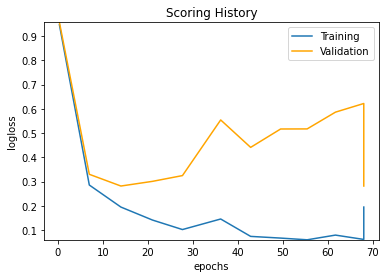

In [16]:
m_200_epochs.plot()

Tuning idea: does it need another layer?

In [17]:
m_200x200x200 = H2ODeepLearningEstimator (epochs = 200,
                    hidden = [200, 200, 200]
                                         )
%time m_200x200x200.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 8min 34s


In [18]:
m_200x200x200.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.10079920352805136
RMSE: 0.31748890299985505
LogLoss: 0.3178764019556817
Mean Per-Class Error: 0.13439229436430555
AUC: 0.9387709531571987
AUCPR: 0.955504060566198
Gini: 0.8775419063143974

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5487388359574398: 


,,NO,YES,Error,Rate
0,NO,1682.0,268.0,0.1374,(268.0/1950.0)
1,YES,354.0,2147.0,0.1415,(354.0/2501.0)
2,Total,2036.0,2415.0,0.1397,(622.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.548739,0.873474,185.0
1,max f2,0.137085,0.916930,327.0
2,max f0point5,0.696257,0.896835,137.0
3,max accuracy,0.600532,0.861829,166.0
4,max precision,0.999954,1.000000,0.0
5,max recall,0.001384,1.000000,396.0
6,max specificity,0.999954,1.000000,0.0
7,max absolute_mcc,0.619902,0.725833,160.0
8,max min_per_class_accuracy,0.542628,0.859256,187.0
9,max mean_per_class_accuracy,0.619902,0.865608,160.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 56.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010335,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.018393,0.018393,77.968812,77.968812,0.018393
1,2,0.020220,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.035986,77.968812,77.968812,0.035986
2,3,0.030106,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.053579,77.968812,77.968812,0.053579
3,4,0.040216,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.071571,77.968812,77.968812,0.071571
4,5,0.050101,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.089164,77.968812,77.968812,0.089164
5,6,0.100202,0.999972,1.779688,1.779688,1.000000,0.999994,1.000000,0.999997,0.089164,0.178329,77.968812,77.968812,0.178329
6,7,0.150079,0.999624,1.779688,1.779688,1.000000,0.999844,1.000000,0.999946,0.088764,0.267093,77.968812,77.968812,0.267093
7,8,0.200180,0.998192,1.779688,1.779688,1.000000,0.999049,1.000000,0.999721,0.089164,0.356257,77.968812,77.968812,0.356257
8,9,0.300157,0.972943,1.739695,1.766367,0.977528,0.990718,0.992515,0.996722,0.173930,0.530188,73.969513,76.636711,0.525060
9,10,0.400135,0.875218,1.547729,1.711738,0.869663,0.933310,0.961819,0.980878,0.154738,0.684926,54.772877,71.173821,0.650054


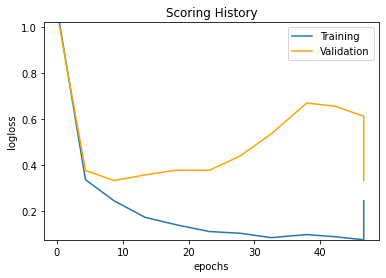

In [19]:
m_200x200x200.plot()

In [20]:
train.nlevels()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 3501,
 0,
 0,
 0,
 0,
 0,
 132,
 134,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2]

In [21]:
m_def.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,602 weights/biases, 9.2 MB, 353,896 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3804,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.488517,0.479429,0,5.21322e-05,0.0258249,-0.313494,0.216442
2,,3,200,Rectifier,0,0,0,0.270055,0.341739,0,-0.00651051,0.0875989,-0.00719368,0.284702
3,,4,2,Softmax,,0,0,0.0250379,0.0558792,0,-0.0517605,0.294489,-0.00839215,0.332714


In [22]:
(3804 * 200) + (200 * 200) + (200*2) #Plus (200 + 200 + 2) biases

801200

In [23]:
train.nlevels() #enum cardinality.. <0 its enum. One is 3.5k different categories

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 3501,
 0,
 0,
 0,
 0,
 0,
 132,
 134,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2]

In [24]:
train.structure()

H2OFrame: 'py_2_sid_9d25' 
Dimensions: 35255 obs. of 31 variables
$ Year              :  num 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987
$ Month             :  num 10 10 10 10 10 10 10 10 10 10
$ DayofMonth        :  num 14 15 17 18 22 23 24 25 26 28
$ DayOfWeek         :  num 3 4 6 7 4 5 6 7 1 3
$ DepTime           :  num 741 729 741 729 728 731 744 729 735 741
$ CRSDepTime        :  num 730 730 730 730 730 730 730 730 730 725
$ ArrTime           :  num 912 903 918 847 852 902 908 851 904 919
$ CRSArrTime        :  num 849 849 849 849 849 849 849 849 849 855
$ UniqueCarrier     :  Factor w/ 10 level(s) "AA","CO","DL","HP","PI","PS","TW","UA","US","WN" 
$ FlightNum         :  num 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451
$ TailNum           :  Factor w/ 3501 level(s) "-N912<0xE5>","-N913<0xE5>","-N918<0xE5>","-N919<0xE5>","-N920<0xE5>","-N922<0xE5>","-N923<0xE5>","-N924<0xE5>","-N925<0xE5>","-N926<0xE5>","-N927<0xE5>","-N928<0xE5>","-N934<0xE5>","-N936<0xE5>","-N955<0xE5>

Models w/out that high cardinality column, remove TailNum

In [25]:
x2 = list(filter(lambda v : v != 'TialNum', xAll))

In [26]:
m2_def = H2ODeepLearningEstimator()
%time m_def.train(x2, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1min 22s


In [27]:
m2_200_epochs = H2ODeepLearningEstimator(epochs = 200,
            stopping_rounds = 5, #default
            stopping_tolerance = 0, #default,
            stopping_metric = "logloss"
            )
%time m2_200_epochs.train(x2, y, train, validation_frame= valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 7min 45s


In [30]:
m2_200_epochs.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,602 weights/biases, 9.2 MB, 2,294,191 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3804,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.512011,0.476996,0,0.000183035,0.0279371,-0.330135,0.223696
2,,3,200,Rectifier,0,0,0,0.271807,0.352612,0,-0.00454921,0.100632,-0.057372,0.323117
3,,4,2,Softmax,,0,0,0.0236352,0.0543762,0,0.041371,0.387334,0.0101786,0.129075


In [31]:
m3_epochs = H2ODeepLearningEstimator(
            stopping_rounds = 5, #default
            stopping_tolerance = 0, #default,
            stopping_metric = "logloss"
            )
%time m3_epochs.train(x2, y, train, validation_frame= valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1min 16s


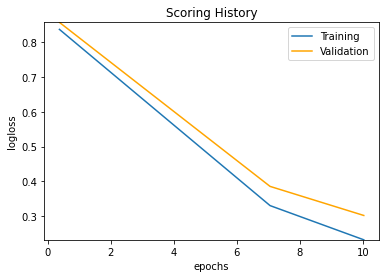

In [32]:
m3_epochs.plot()